In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("file/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [3]:
sessions <- read_csv("file/sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
mashup <- players |>
    select(hashedEmail, experience) |>
    merge(sessions, by = "hashedEmail") |>
    select(hashedEmail:end_time) |>
    separate(col = start_time, into = c("start_date", "start_time"), sep = " ") |>
    separate(col = end_time, into = c("end_date", "end_time"), sep = " ") |>
    select(experience, start_time, end_time)
mashup

experience,start_time,end_time
<chr>,<chr>,<chr>
Regular,00:22,01:07
Regular,23:12,00:13
Pro,04:28,04:58
⋮,⋮,⋮
Amateur,15:36,15:57
Amateur,15:33,15:42
Beginner,09:11,10:23


In [11]:
msm <- mashup |>
    separate(col = start_time, into = c("start_hour", "start_minute"), sep = ":") |>
    separate(col = end_time, into = c("end_hour", "end_minute"), sep = ":") |>
    mutate(start_hour = as.numeric(start_hour)) |>
    mutate(start_minute = as.numeric(start_minute)) |>
    mutate(end_hour = as.numeric(end_hour)) |>
    mutate(end_minute = as.numeric(end_minute))
msm

experience,start_hour,start_minute,end_hour,end_minute
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Regular,0,22,1,7
Regular,23,12,0,13
Pro,4,28,4,58
⋮,⋮,⋮,⋮,⋮
Amateur,15,36,15,57
Amateur,15,33,15,42
Beginner,9,11,10,23


In [13]:
msm_calc <- msm |>
    mutate(start_msm = start_hour*60 + start_minute) |>
    mutate(end_msm = end_hour * 60 + end_minute) |>
    select(experience, start_msm, end_msm)
msm_calc

experience,start_msm,end_msm
<chr>,<dbl>,<dbl>
Regular,22,67
Regular,1392,13
Pro,268,298
⋮,⋮,⋮
Amateur,936,957
Amateur,933,942
Beginner,551,623


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


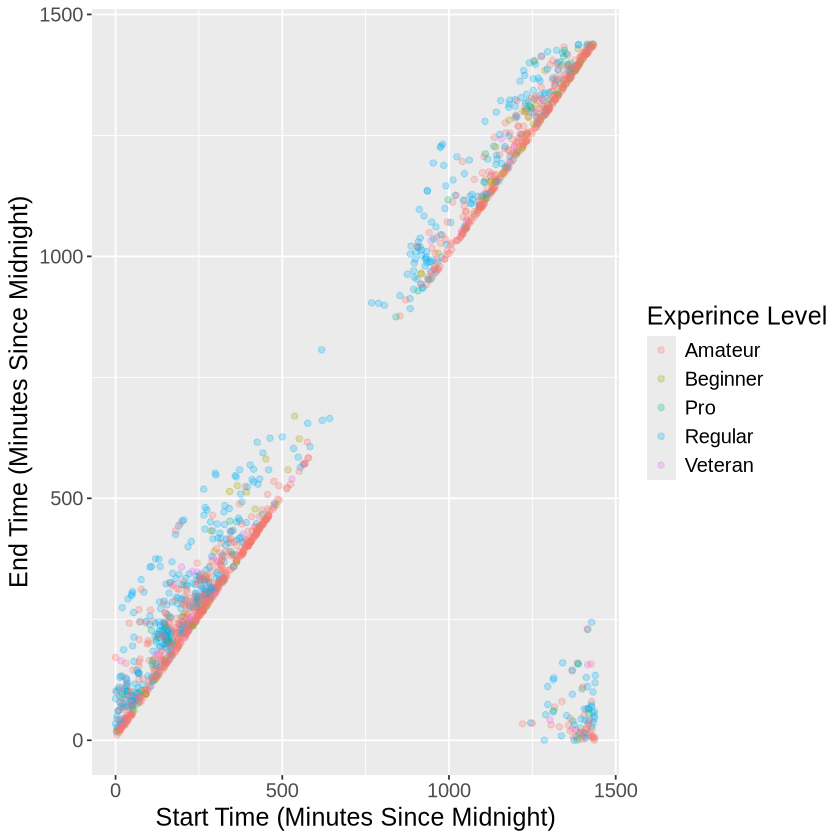

In [16]:
msm_plot <- msm_calc |> ggplot(aes(x = start_msm, y = end_msm, color = experience)) +
    geom_point(alpha = 0.25) + 
    labs(x = "Start Time (Minutes Since Midnight)", y = "End Time (Minutes Since Midnight)", color = "Experince Level") +
    theme(text = element_text(size = 15))
msm_plot